In [342]:
import tensorflow
import keras

### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [343]:
import tensorflow
import keras

print(tensorflow.__version__)
print(keras.__version__)

2.15.0
2.15.0


### Q2. Load the Wine Quality dataset and explore its dimensions.

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [345]:
df= pd.read_csv("wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


### Analysis :
- Data points : 1599
- Columns: 12
- No missing data
- Appropriate data types

## Q3. Check for null values, identify categorical variables, and encode them.

- No missing values
- Only output variable is categorical


In [347]:
# checking the number of categories
df["quality"].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [348]:
df["quality"] = np.where(df["quality"]=="bad", 0, 1)

In [349]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Q4. Separate the features and target variables from the dataframe.

In [350]:
# segregating dependent and dependent features
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [351]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [352]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

## Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [353]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(1199, 11) (400, 11)


In [354]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1565,6.7,0.67,0.02,1.90,0.061,26.0,42.0,0.99489,3.39,0.82,10.9
327,10.3,0.44,0.50,4.50,0.107,5.0,13.0,0.99800,3.28,0.83,11.5
254,7.1,0.60,0.00,1.80,0.074,16.0,34.0,0.99720,3.47,0.70,9.9
322,7.8,0.62,0.05,2.30,0.079,6.0,18.0,0.99735,3.29,0.63,9.3


In [355]:
y_test.shape

(400,)

## Q6. Perform scaling on the dataset.

In [356]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

print("X_train scaled : ",X_train_scaled)
print("\n")
print("X_test scaled: ",X_test_scaled)

X_train scaled :  [[ 1.97418149 -0.23260309  1.11458849 ... -0.78641859 -1.3131938
  -1.15257747]
 [ 0.28189382  0.37802632  0.09088663 ...  0.3161036  -0.97064635
  -1.24703683]
 [-0.71013687  0.32251456 -1.39348108 ...  0.70522908 -0.62809889
   1.01998773]
 ...
 [-0.65178213  0.48904985 -1.08637052 ...  1.28891729 -0.68519014
  -0.8691994 ]
 [-0.2432989  -1.84244427  0.39799719 ...  0.05668661  0.79918216
   1.39782516]
 [-1.46874859 -1.34283839 -0.06266865 ...  0.51066634 -0.68519014
   2.90917487]]


X_test scaled:  [[-3.60008393e-01  1.55979263e-01 -9.84000334e-01 ... -4.62147357e-01
  -9.52314295e-05 -7.74740045e-01]
 [-3.01653646e-01 -1.77091327e-01 -5.23334494e-01 ...  5.10666338e-01
  -1.02773759e+00 -8.69199402e-01]
 [ 1.39063402e+00  7.66608676e-01 -2.67409028e-01 ... -2.02730371e-01
   1.82682451e+00 -4.91361975e-01]
 ...
 [-7.10136875e-01  3.78026322e-01 -1.39348108e+00 ...  1.02950031e+00
   2.28269736e-01 -4.91361975e-01]
 [-3.01653646e-01  4.89049852e-01 -1.13755561e+0

In [357]:
X_train_scaled.shape, y_train.shape

((1199, 11), (1199,))

In [358]:
X_test_scaled.shape

(400, 11)

## Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

## Q8. Create a Sequential model and add all the layers to it.

In [359]:
from keras.models import Sequential
from keras.layers import  Flatten, Dense, Dropout, BatchNormalization

# build the model object
model= Sequential()

# FC_1: fully connected to get all relevant data
model.add(Dense(60, activation='relu', input_shape=(11,)))
model.add(Dense(30, activation='relu'))
# FC_2: output a softmax to squash the matrix into output probabilities for the 2 classes
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 60)                720       
                                                                 
 dense_34 (Dense)            (None, 30)                1830      
                                                                 
 dense_35 (Dense)            (None, 2)                 62        
                                                                 
Total params: 2612 (10.20 KB)
Trainable params: 2612 (10.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.
- Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.
- Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.
- Q12. Print the model summary.

**Tensorboard callback**

In [360]:
#logging
log_folder = 'logs'
%load_ext tensorboard
# !rm -rf logs
!rm -rf logs
tb_cb = tensorflow.keras.callbacks.TensorBoard(log_dir = log_folder , histogram_freq = 1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [361]:
# Early Stopping Callback
early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(monitor= "val_loss",patience= 5 , min_delta=0.01)

In [362]:
# Model Checkpoint
CKPT_path = "wine.keras"
check_point_cb = tensorflow.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True ,verbose=1)

* Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
* Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [363]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use : tf.losses.sparse_categotical_crossentropy
OPTIMIZER = "adam" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss = LOSS_FUNCTION ,
                 optimizer = OPTIMIZER,
                 metrics = METRICS)

### Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [364]:
# training
EPOCHS = 30
VALIDATION_SET = (X_test_scaled , y_test)
history = model.fit(X_train_scaled,y_train ,epochs = EPOCHS ,validation_data=VALIDATION_SET,
                         batch_size=32,callbacks= [tb_cb, early_stopping_cb, check_point_cb], verbose=2, shuffle=True)

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.59236, saving model to wine.keras
38/38 - 1s - loss: 0.6508 - accuracy: 0.6280 - val_loss: 0.5924 - val_accuracy: 0.7150 - 1s/epoch - 36ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.59236 to 0.55137, saving model to wine.keras
38/38 - 0s - loss: 0.5391 - accuracy: 0.7314 - val_loss: 0.5514 - val_accuracy: 0.7225 - 319ms/epoch - 8ms/step
Epoch 3/30

Epoch 3: val_loss improved from 0.55137 to 0.54156, saving model to wine.keras
38/38 - 0s - loss: 0.5142 - accuracy: 0.7465 - val_loss: 0.5416 - val_accuracy: 0.7200 - 287ms/epoch - 8ms/step
Epoch 4/30

Epoch 4: val_loss improved from 0.54156 to 0.52904, saving model to wine.keras
38/38 - 1s - loss: 0.5066 - accuracy: 0.7490 - val_loss: 0.5290 - val_accuracy: 0.7225 - 871ms/epoch - 23ms/step
Epoch 5/30

Epoch 5: val_loss improved from 0.52904 to 0.51987, saving model to wine.keras
38/38 - 0s - loss: 0.4952 - accuracy: 0.7556 - val_loss: 0.5199 - val_accuracy: 0.7175 - 328ms/epoch -

## Q16. Get the model's parameters.
## Q17. Store the model's training history as a Pandas DataFrame.

In [365]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.650843,0.628023,0.592361,0.7150
1,0.539115,0.731443,0.551366,0.7225
2,0.514161,0.746455,0.541557,0.7200
3,0.506638,0.748957,0.529037,0.7225
4,0.495194,0.755630,0.519866,0.7175
5,0.488006,0.761468,0.517417,0.7450
6,0.482578,0.761468,0.508759,0.7400
7,0.479623,0.761468,0.500904,0.7300
8,0.473686,0.759800,0.497826,0.7375
9,0.467179,0.768974,0.498841,0.7425


## Q18. Plot the model's training history.

<Axes: >

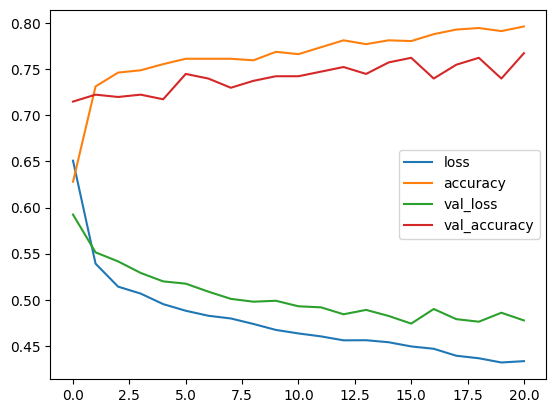

In [366]:
pd.DataFrame(history.history).plot()

## Q19. Evaluate the model's performance using the test data.

In [367]:
y_pred = model.predict(X_test)
print(y_pred[:10])

13/13 [==============================] - 0s 2ms/step
[[1.0000000e+00 5.3659872e-15]
 [1.0000000e+00 9.4138723e-36]
 [1.0000000e+00 4.7818101e-08]
 [1.0000000e+00 5.5303402e-18]
 [1.0000000e+00 3.1824978e-09]
 [1.0000000e+00 1.6923636e-24]
 [1.0000000e+00 0.0000000e+00]
 [9.9391031e-01 6.0897097e-03]
 [1.0000000e+00 5.0663729e-08]
 [9.9999523e-01 4.7545263e-06]]


In [368]:
model.evaluate(X_test_scaled,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7675


[0.477509081363678, 0.7674999833106995]

In [369]:
np.argmax(y_pred[:5],axis=1)

array([0, 0, 0, 0, 0])

In [370]:
y_test[:5]

803     1
124     0
350     1
682     0
1326    1
Name: quality, dtype: int64